In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [70]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class CryptoData:
    def add_class(self, ticker, start, end,interval = None):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.interval = interval
        self.data = self.get_data()

    def plot_data(self):
        # Plot the price data
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=self.data.index, y=self.data["Price"])
        plt.show()
    def getter_data(self):
        return self.data
    def get_data(self):
        data1 = yf.download(self.ticker, self.start, self.end)
        data2 = data1["Close"]
        if isinstance(data2, pd.DataFrame):
            data3 = data2["BTC-USD"]
        df = data3.to_frame(name="Close")
        df.rename(columns={"Close": "Price"}, inplace=True)
        return df
        
    def set_sma(self):
        list_sma = []
        n = int(input("Enter how many SMA you want: "))
        for i in range(n):
            window = int(input(f"Enter SMA window size for SMA #{i+1}: "))
            list_sma.append(window)
        for window in list_sma:
            col_name = f"SMA_{window}"
            self.data[col_name] = self.data["Price"].rolling(window=window).mean()
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=self.data.index, y=self.data["Price"].squeeze(), label="Price")
        for window in list_sma:
            col_name = f"SMA_{window}"
            sns.lineplot(x=self.data.index, y=self.data[col_name].squeeze(), label=col_name)
        plt.title(f"{self.ticker} Price with SMA(s)")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.show()

    def implement_bollinger_band(self):
        for date , row in data.iterrows():
            price = row["Price"]
            bol_up = row["BOLL_UPPER_20"]
            bol_down = row["BOLL_LOWER_20"]
        if price > bol_up:
            data.at[date,"position"]=-1
        elif price < bol_down:
            data.at[date,"position"] = 1
        else:
            data.at[date,"position"] = 0
        #how i imeplement if ican set like down arrow when -1 andd up arrow if + when i plot 
    # def set_bollinger_band(self, window = 20 , k = 2):
    #     prices = self.data["Price"]
    #     sma_list = [] #store the rolling mean 
    #     upper_band = []
    #     lower_band = []
    #     for i in range(len(prices)):
    #         if i < window - 1 : 
    #             sma_list.append(None)
    #             upper_band.append(None)
    #             lower_band.append(None)
    #         else:
    #             window_prices = prices.iloc[i-window + 1 : i + 1 ]
    #             mean = window_prices.mean()
    #             mean = window_prices.mean()
    #             squared_differences = (window_prices - mean)**2
    #             var = squared_differences.mean()
    #             std = var ** 0.5
    #             sma_list.append(mean)
    #             upper_band.append(mean + k *std)
    #             lower_band.append(mean - k * std)
    #     self.data[f"BOLL_SMA_{window}"] = sma_list
    #     self.data[f"BOLL_UPPER_{window}"] = upper_band
    #     self.data[f"BOLL_LOWER_{window}"] = lower_band
    #     self.implement_bollinger_band()
    #     plt.figure(figsize=(30, 10))
    #     sns.lineplot(data=self.data, x=self.data.index, y="Price", color="blue", label = "Price")  
    #     sns.lineplot(data=self.data, x=self.data.index, y=f"BOLL_SMA_{window}", color="orange", label = f"SMA{window}")   
    #     sns.lineplot(data=self.data, x=self.data.index, y=f"BOLL_UPPER_{window}", color="green",label = "Upper bnd") 
    #     sns.lineplot(data=self.data, x=self.data.index, y=f"BOLL_LOWER_{window}", color="red",label = "Lower bnd")  
    #     plt.legend()
    #     plt.show()
    # def set_bollinger_band_ema(self, window=20, k=2):
    #     prices = self.data["Price"]
    # # Calculate EMA as the centerline (more sensitive to recent data)
    #     ema = prices.ewm(span=window, adjust=False).mean()
    
    # # Use rolling standard deviation (window remains the same)
    #     std = prices.rolling(window=window).std()

    # # Calculate the upper and lower bands based on the EMA
    #     upper_band = ema + k * std
    #     lower_band = ema - k * std
    
    
    #     self.data[f"BOLL_EMA_{window}"] = ema
    #     self.data[f"BOLL_UPPER_{window}"] = upper_band
    #     self.data[f"BOLL_LOWER_{window}"] = lower_band

    
    #     plt.figure(figsize=(30, 10))
    #     sns.lineplot(data=self.data, x=self.data.index, y="Price", color="blue", label="Price")
    #     sns.lineplot(data=self.data, x=self.data.index, y=f"BOLL_EMA_{window}", color="orange", label=f"EMA {window}")
    #     sns.lineplot(data=self.data, x=self.data.index, y=f"BOLL_UPPER_{window}", color="green", label="Upper Band")
    #     sns.lineplot(data=self.data, x=self.data.index, y=f"BOLL_LOWER_{window}", color="red", label="Lower Band")
    #     plt.legend()
    #     plt.show()
    


[*********************100%***********************]  1 of 1 completed


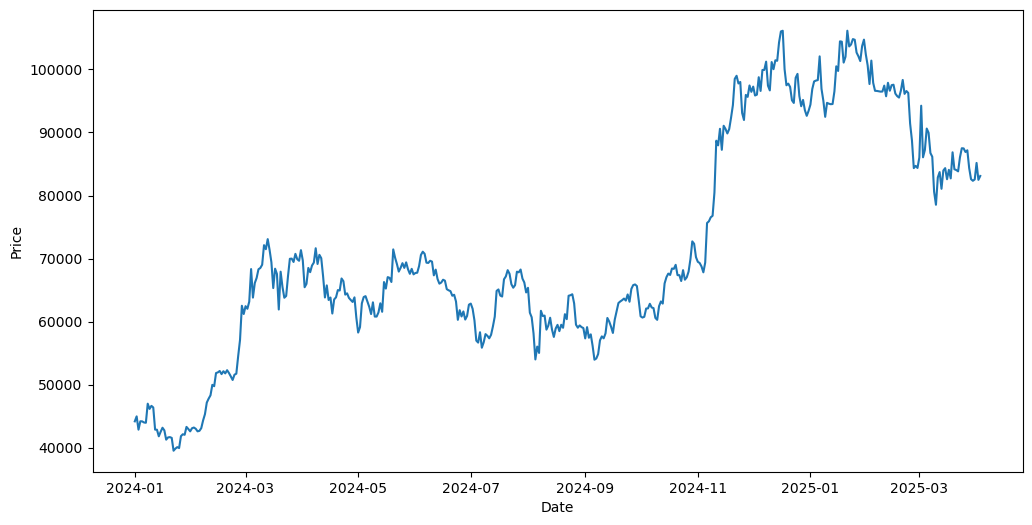

In [71]:
crypto = CryptoData()
crypto.add_class("BTC-USD", "2024-01-01", "2025-04-04","4hr")
crypto.plot_data()

Enter how many SMA you want:  2
Enter SMA window size for SMA #1:  10
Enter SMA window size for SMA #2:  60


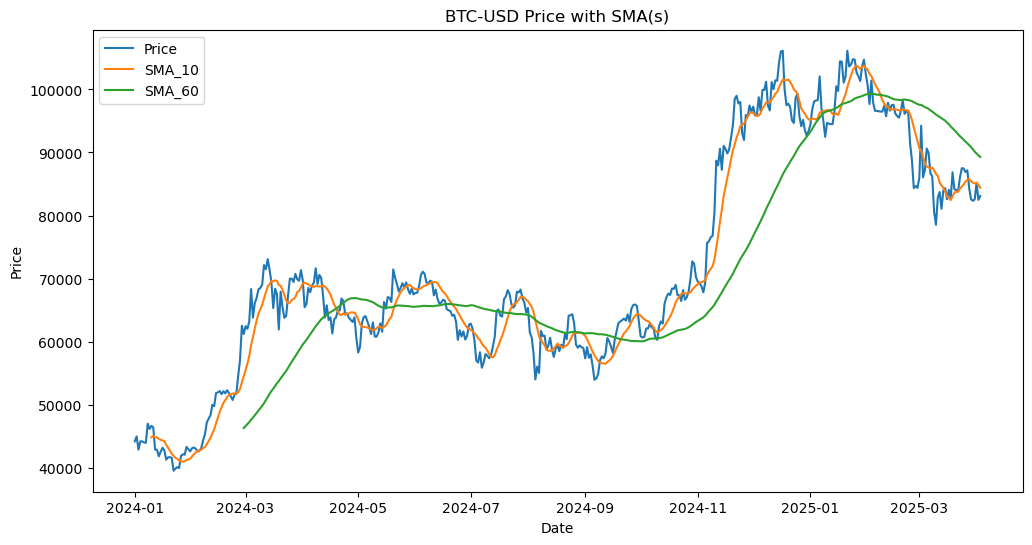

In [72]:
crypto.set_sma()

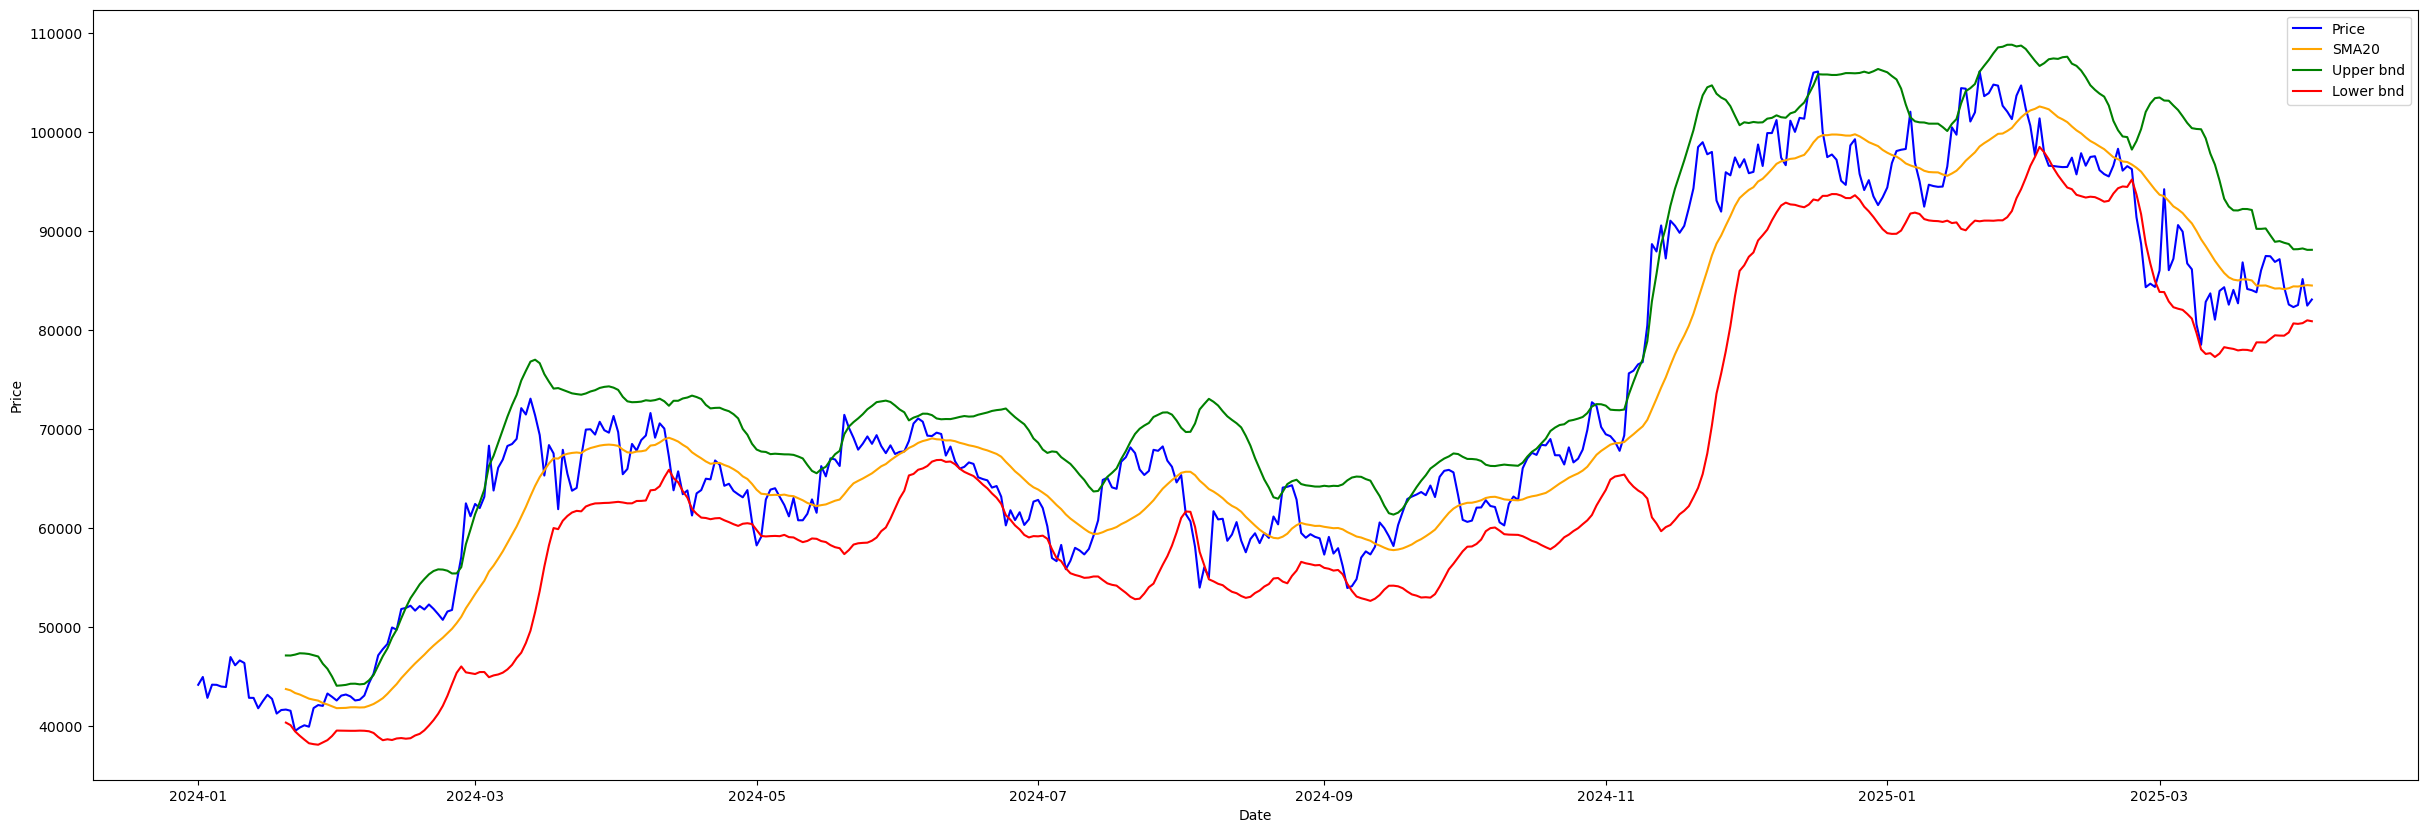

In [73]:
crypto.set_bollinger_band(window=20, k=2)

In [ ]:
# import yfinance as yf
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# class CryptoData:
#     def add_class(self, ticker, start, end, interval=None):
#         """
#         Initialize the class with a given ticker, date range, and (optional) data interval.
#         The data is then downloaded.
#         """
#         self.ticker = ticker
#         self.start = start
#         self.end = end
#         self.interval = interval
#         self.data = self.get_data()

#     def get_data(self):
#         """
#         Download historical data from yfinance.
#         The method extracts the 'Close' prices and renames the column to 'Price'.
#         """
#         data1 = yf.download(self.ticker, self.start, self.end, interval=self.interval)
#         # Ensure we grab the correct data (if data comes as a DataFrame with 'Close' already)
#         df = data1[['Close']].copy()
#         df.rename(columns={"Close": "Price"}, inplace=True)
#         return df

#     def plot_data(self):
#         """
#         Basic plotting of the price data using seaborn.
#         """
#         plt.figure(figsize=(12, 6))
#         sns.lineplot(x=self.data.index, y=self.data["Price"])
#         plt.title(f"{self.ticker} Price")
#         plt.xlabel("Date")
#         plt.ylabel("Price")
#         plt.show()

#     def set_sma(self, windows=None):
#         """
#         Compute and plot Simple Moving Averages (SMA) for given window sizes.
#         If no window list is provided, default windows [20, 50, 200] are used.
#         """
#         if windows is None:
#             windows = [20, 50, 200]
#         for window in windows:
#             self.data[f"SMA_{window}"] = self.data["Price"].rolling(window=window).mean()
#         plt.figure(figsize=(12, 6))
#         sns.lineplot(data=self.data, x=self.data.index, y="Price", label="Price")
#         for window in windows:
#             sns.lineplot(data=self.data, x=self.data.index, y=f"SMA_{window}", label=f"SMA_{window}")
#         plt.title(f"{self.ticker} Price with SMA(s)")
#         plt.xlabel("Date")
#         plt.ylabel("Price")
#         plt.legend()
#         plt.show()

#     def implement_bollinger_band(self):
#         """
#         Generate trading signals using the Bollinger bands.
#         For each data point (assuming Bollinger bands are in columns 'BOLL_UPPER_20' and 'BOLL_LOWER_20'),
#         if Price > Upper Band then signal is -1 (sell), if Price < Lower Band then signal is +1 (buy), otherwise 0.
#         Afterwards, plot the Price, Bollinger bands, and overlay buy (up arrow) and sell (down arrow) markers.
#         """
#         # Initialize the 'position' column with zeros.
#         self.data["position"] = 0
#         for date, row in self.data.iterrows():
#             price = row["Price"]
#             bol_up = row.get("BOLL_UPPER_20", None)
#             bol_down = row.get("BOLL_LOWER_20", None)
#             if bol_up is None or bol_down is None:
#                 self.data.at[date, "position"] = 0
#             elif price > bol_up:
#                 self.data.at[date, "position"] = -1
#             elif price < bol_down:
#                 self.data.at[date, "position"] = 1
#             else:
#                 self.data.at[date, "position"] = 0

#         # Plot the price series with Bollinger bands and mark positions.
#         plt.figure(figsize=(15, 8))
#         plt.plot(self.data.index, self.data["Price"], label="Price", color="blue")
#         if "BOLL_UPPER_20" in self.data.columns and "BOLL_LOWER_20" in self.data.columns:
#             plt.plot(self.data.index, self.data["BOLL_UPPER_20"], label="Upper Band", color="green")
#             plt.plot(self.data.index, self.data["BOLL_LOWER_20"], label="Lower Band", color="red")
#         # Identify buy and sell signal points
#         buy_signals = self.data[self.data["position"] == 1]
#         sell_signals = self.data[self.data["position"] == -1]
#         plt.scatter(buy_signals.index, buy_signals["Price"], marker="^", color="green", s=100, label="Buy Signal")
#         plt.scatter(sell_signals.index, sell_signals["Price"], marker="v", color="red", s=100, label="Sell Signal")
#         plt.title(f"{self.ticker} Price with Bollinger Signals")
#         plt.xlabel("Date")
#         plt.ylabel("Price")
#         plt.legend()
#         plt.show()

#     def set_bollinger_band(self, window=20, k=2):
#         """
#         Compute Bollinger Bands using a simple moving average as the centerline.
#         The method calculates the rolling SMA, standard deviation, and then the upper and lower bands.
#         After computing, it calls implement_bollinger_band() to generate and plot trading signals.
#         """
#         prices = self.data["Price"]
#         sma_list = []    # Rolling SMA values
#         upper_band = []  # Upper Bollinger band values
#         lower_band = []  # Lower Bollinger band values
#         for i in range(len(prices)):
#             if i < window - 1:
#                 sma_list.append(None)
#                 upper_band.append(None)
#                 lower_band.append(None)
#             else:
#                 # Get window of prices
#                 window_prices = prices.iloc[i - window + 1: i + 1]
#                 mean = window_prices.mean()
#                 std = window_prices.std()  # Standard deviation for current window
#                 sma_list.append(mean)
#                 upper_band.append(mean + k * std)
#                 lower_band.append(mean - k * std)
#         # Add columns for Bollinger Bands
#         self.data[f"BOLL_SMA_{window}"] = sma_list
#         self.data[f"BOLL_UPPER_{window}"] = upper_band
#         self.data[f"BOLL_LOWER_{window}"] = lower_band

#         # Generate signals based on these bands using a fixed window of 20 in the signal logic.
#         # (Ensure that window=20 was used here or update implement_bollinger_band accordingly.)
#         self.implement_bollinger_band()

#         # Plot the Bollinger bands along with the price
#         plt.figure(figsize=(15, 8))
#         sns.lineplot(data=self.data, x=self.data.index, y="Price", color="blue", label="Price")
#         sns.lineplot(data=self.data, x=self.data.index, y=f"BOLL_SMA_{window}", color="orange", label=f"SMA_{window}")
#         sns.lineplot(data=self.data, x=self.data.index, y=f"BOLL_UPPER_{window}", color="green", label="Upper Band")
#         sns.lineplot(data=self.data, x=self.data.index, y=f"BOLL_LOWER_{window}", color="red", label="Lower Band")
#         plt.title(f"{self.ticker} Bollinger Bands")
#         plt.xlabel("Date")
#         plt.ylabel("Price")
#         plt.legend()
#         plt.show()

#     def set_bollinger_band_ema(self, window=20, k=2):
#         """
#         Compute Bollinger Bands based on an Exponential Moving Average (EMA).
#         Uses the EMA as the centerline and a rolling standard deviation for the bands.
#         The method then plots the Price with the EMA-based bands.
#         """
#         prices = self.data["Price"]
#         # Calculate EMA using Pandas' built-in ewm (this is acceptable since you're not
#         # re-implementing EMA manually here)
#         ema = prices.ewm(span=window, adjust=False).mean()
#         # Rolling standard deviation remains the same window size
#         std = prices.rolling(window=window).std()
#         # Calculate Bollinger Bands based on EMA
#         upper_band = ema + k * std
#         lower_band = ema - k * std

#         # Add EMA and Bollinger Bands to DataFrame
#         self.data[f"BOLL_EMA_{window}"] = ema
#         self.data[f"BOLL_UPPER_{window}"] = upper_band
#         self.data[f"BOLL_LOWER_{window}"] = lower_band

#         # Plot the EMA-based Bollinger Bands
#         plt.figure(figsize=(15, 8))
#         sns.lineplot(data=self.data, x=self.data.index, y="Price", color="blue", label="Price")
#         sns.lineplot(data=self.data, x=self.data.index, y=f"BOLL_EMA_{window}", color="orange", label=f"EMA_{window}")
#         sns.lineplot(data=self.data, x=self.data.index, y=f"BOLL_UPPER_{window}", color="green", label="Upper Band")
#         sns.lineplot(data=self.data, x=self.data.index, y=f"BOLL_LOWER_{window}", color="red", label="Lower Band")
#         plt.title(f"{self.ticker} EMA-Based Bollinger Bands")
#         plt.xlabel("Date")
#         plt.ylabel("Price")
#         plt.legend()
#         plt.show()

# # Example usage:
# # cd = CryptoData()
# # cd.add_class("BTC-USD", "2021-01-01", "2021-12-31", interval="1d")
# # cd.plot_data()
# # cd.set_sma()
# # cd.set_bollinger_band(window=20, k=2)
# # cd.set_bollinger_band_ema(window=20, k=2)
